In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.mnist.load_data()

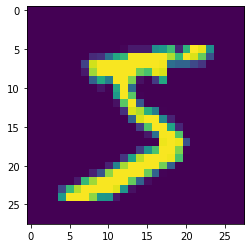

In [3]:
plt.imshow(X_train_full[0])

In [4]:
X_train_full.shape

(60000, 28, 28)

<h3> DNN Summary </h3> 

A DNN trained with 5 hiddens layers, 1 Flatten input layer

In [19]:
model_dnn = keras.models.Sequential()
model_dnn.add(keras.layers.Flatten(input_shape = [28,28]))
model_dnn.add(keras.layers.Dense(100,activation = "elu",kernel_initializer="he_normal"))
model_dnn.add(keras.layers.Dense(100,activation = "elu",kernel_initializer="he_normal"))
model_dnn.add(keras.layers.Dense(100,activation = "elu",kernel_initializer="he_normal"))
model_dnn.add(keras.layers.Dense(100,activation = "elu",kernel_initializer="he_normal"))
model_dnn.add(keras.layers.Dense(100,activation = "elu",kernel_initializer="he_normal"))
model_dnn.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

Preparing the MNIST Data. 

First we shall only train on 0 to 4 digit labels, as we will use the rest for transfer learning.

In [7]:
def Prepdata0to4(X,y):
        y_data = y[np.where((y == 0) | (y == 1) | (y == 2)|(y == 3)| (y == 4))[0]]
        X_data = X[np.where((y == 0) | (y == 1) | (y == 2)|(y == 3)| (y == 4))[0]]
        return (X_data,y_data)

In [8]:
(X_data_train0to4,y_data_train0to4) = Prepdata0to4(X_train_full,y_train_full)

In [9]:
X_data_train0to4 = X_data_train0to4[:25000]
y_data_train0to4 = y_data_train0to4[:25000]
X_data_valid0to4 = X_data_train0to4[25000:]
y_data_valid0to4 = y_data_train0to4[25000:]

In [18]:
X_data_train0to4.shape

(25000, 28, 28)

In [10]:
(X_data_test0to4,y_data_test0to4) = Prepdata0to4(X_test,y_test)

In [11]:
X_data_train0to4.shape

(25000, 28, 28)

In [12]:
#beta_1 is the momentum for moving mean of gradient
#beta_2 is the momentum for moving mean of squared gradient
adamoptim = keras.optimizers.Adam(lr = 0.001,beta_1=0.9,beta_2=0.999)
#callbacks to use
#checkpoints
checkpoint_cb = keras.callbacks.ModelCheckpoint("zerotofour.h5", save_best_only=True)
#early stopping callback
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

In [13]:
#metrics
accuracy = keras.metrics.Accuracy()
precision = keras.metrics.Precision()
recall = keras.metrics.Recall()
aucscore = keras.metrics.AUC()

In [22]:
model_dnn.compile(loss = "sparse_categorical_crossentropy",
                    optimizer = adamoptim, 
                    metrics = [accuracy,precision,recall,aucscore])

In [23]:
model_dnn.fit(X_data_train0to4,y_data_train0to4, epochs = 40, validation_data=(X_data_valid0to4,y_data_valid0to4), callbacks = [checkpoint_cb,earlystopping_cb])

Epoch 1/40


ValueError: in user code:

    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:408 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\metrics.py:618 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\metrics.py:3214 accuracy  **
        y_pred.shape.assert_is_compatible_with(y_true.shape)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10) and (None, 1) are incompatible
